<a href="https://colab.research.google.com/github/khushboogupta13/Basic-ML-Algorithms/blob/master/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:

x,y = make_blobs(n_samples=1000, centers = 2, random_state=0)


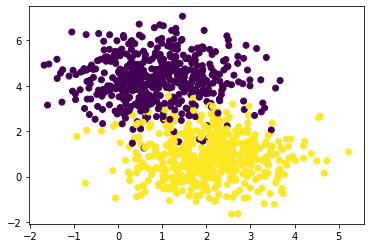

In [3]:
plt.scatter(x[:,0],x[:,1],c=y)

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42, test_size = 0.33)

In [5]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
model.predict(x_test[:5])

array([0, 0, 1, 1, 1])

In [7]:
y_test[:5]

array([0, 0, 0, 1, 1])

In [8]:
model.coef_, model.intercept_

(array([[ 0.76155547, -3.02812325]]), array([6.87210192]))

In [9]:
x1_sample = np.linspace(-6,7)
colors = ["red","blue"]

In [10]:
y_colors = list(map(lambda c:colors[c],y))

In [11]:
y_colors[:5], y[:5]

(['red', 'red', 'red', 'blue', 'blue'], array([0, 0, 0, 1, 1]))

In [12]:
zip(model.coef_, model.intercept_)

In [13]:
b = list(enumerate(zip(model.coef_, model.intercept_)))
b

[(0, (array([ 0.76155547, -3.02812325]), 6.872101915329484))]

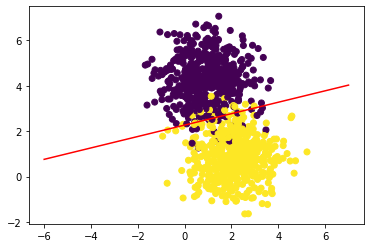

In [14]:
plt.scatter(x[:,0],x[:,1],c=y)
for i,(coef,intercept) in enumerate(zip(model.coef_,model.intercept_)):
  x2_sample = -coef[0]/coef[1]*x1_sample - intercept/coef[1]
  plt.plot(x1_sample, x2_sample, color = colors[i])

In [15]:
model.score(x_test,y_test)*100

96.06060606060606

In [16]:
x,y = make_blobs(centers = 2, random_state= 0)

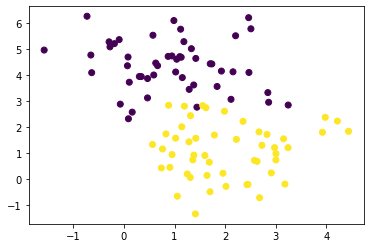

In [17]:
plt.scatter(x[:,0],x[:,1],c=y)

In [28]:
class CustomLogisticRegression:
    
    def __init__(self, lr=0.01, iters=20):
        self.__lr = lr
        self.__iters = iters
    
    def fit(self, X, y):
        
        self.__y = y.reshape(-1, 1)
        X_mod = np.hstack([np.ones([len(X), 1]), X])
        self.__X = X_mod
        
        self.__theta = np.zeros([X_mod.shape[1], 1])
        
        err = []
        for i in range(self.__iters):
            err.append(self.error())
            self.gradient_accend()
            
        self.theta_ = self.__theta 
            
        return err
        
    def gradient_accend(self):
        delta_theta = self.gradient()
#         print(delta_theta.shape) # (3,1)
        self.__theta -= delta_theta
        
    def gradient(self):
        yh = self.hypothesis(self.__X)
#         print(yh.shape) # (100, 1)
        ya = self.__y
        diff = -(ya - yh) # (100, 1) # here i have taken -ve of log likelyhood, hence gradiet descent            
        return np.dot(self.__X.T, diff) * self.__lr # (3,1) # for every feature, sum(diff * ith example)
        
    def hypothesis(self, X):
        prod = np.dot(X, self.__theta)
#         print(X.shape) # (100,3)        
#         print(self.__theta.shape) # (3,1)
#         print(prod.shape) # (100,1)
        return 1 / (1 + np.exp(-prod))
        
    def error(self):
        yh = self.hypothesis(self.__X)
        ya = self.__y
        ll = ya*np.log(yh) + (1-ya)*np.log(1-yh)
#         print(ll.shape) # (100, 1)
        return -np.mean(ll)
    
    def predict(self, X):
        X_mod = np.hstack([np.ones([len(X), 1]), X])
        yh = self.hypothesis(X_mod)
        
        return (yh > .5).astype(int).flatten()
    
    def score(self, X, y):
        yp = self.predict(X)
        return np.mean(yp == y)



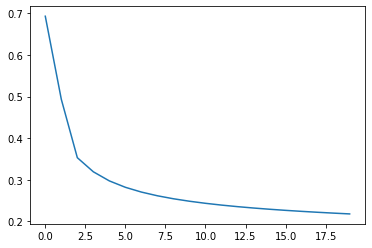

In [29]:
model1 = CustomLogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=42)
err = model1.fit(x_train, y_train)
plt.plot(err)

In [30]:
model1.score(x_test,y_test)

0.8787878787878788